In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


import math,datetime
import time
import arrow
from sklearn import preprocessing,cross_validation,svm # Preprocessing for scaling data,Accuracy,Processing speed ,cross validation for training and testing
from sklearn.linear_model import LinearRegression #
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pickle

# Any results you write to the current directory are saved as output.
#Simple Linear regression works whatever the features we feed through it

In [76]:
#Read the data
df = pd.read_csv('/kaggle/input/adaniport/ADANIPORTS.csv', index_col='Date', parse_dates=["Date"])
print (df.head())

                Symbol Series     ...       Deliverable Volume  %Deliverble
Date                              ...                                      
2007-11-27  MUNDRAPORT     EQ     ...                  9859619       0.3612
2007-11-28  MUNDRAPORT     EQ     ...                  1453278       0.3172
2007-11-29  MUNDRAPORT     EQ     ...                  1069678       0.2088
2007-11-30  MUNDRAPORT     EQ     ...                  1260913       0.2735
2007-12-03  MUNDRAPORT     EQ     ...                   816123       0.2741

[5 rows x 14 columns]


In [77]:
# Check the columns in the DataFrame
print(df.columns)

# Remove the 'EQ' column
df = df.drop('Series', axis=1)

# Check the columns again
print(df.columns)

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')
Index(['Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')


In [78]:
#Simplify the data to get High Accuracy
#We just re created the data frame by using below parameters
#here high and low describes the price change in day
#Open means starting price of the day
#close means tells the end prices of day
df=df[['Open','High','Low','Close','Volume']]
print (df.head())

              Open     High    Low   Close    Volume
Date                                                
2007-11-27  770.00  1050.00  770.0  962.90  27294366
2007-11-28  984.00   990.00  874.0  893.90   4581338
2007-11-29  909.00   914.75  841.0  884.20   5124121
2007-11-30  890.00   958.00  890.0  921.55   4609762
2007-12-03  939.75   995.00  922.0  969.30   2977470


In [79]:

#here high (highest stock price of the day) and close(the stock price at the end of the day)
#Calculating percent volatility
df['HIGHLOW_PCT']=(df['High']-df['Close'])/(df['Close'])*100
#Calculating new and old prices
df['PCT_Change']=(df['Close']-df['Open'])/(df['Open'])*100
# Extracting required data from file
df=df[['Close','HIGHLOW_PCT','PCT_Change','Volume']]
print (df.head())

             Close  HIGHLOW_PCT  PCT_Change    Volume
Date                                                 
2007-11-27  962.90     9.045591   25.051948  27294366
2007-11-28  893.90    10.750643   -9.156504   4581338
2007-11-29  884.20     3.455101   -2.728273   5124121
2007-11-30  921.55     3.955293    3.544944   4609762
2007-12-03  969.30     2.651398    3.144453   2977470


In [80]:
#forecast volume to calculate future stocks
forecast_col='Close'
#We have to replace to na data with negative 99999.It will be useful when we lacking with data
df.fillna(-99999,inplace=True)
# if the length of data frame is returning decimal point or float it will round up to integer
# 0.1 means tomorrow data ,we can change accordingly
forecast_out=int(math.ceil(0.01*len(df)))
print (forecast_out)
df['label']=df[forecast_col].shift(-forecast_out)
print (df.head())

34
             Close  HIGHLOW_PCT  PCT_Change    Volume    label
Date                                                          
2007-11-27  962.90     9.045591   25.051948  27294366  1030.40
2007-11-28  893.90    10.750643   -9.156504   4581338  1020.90
2007-11-29  884.20     3.455101   -2.728273   5124121   994.60
2007-11-30  921.55     3.955293    3.544944   4609762   825.05
2007-12-03  969.30     2.651398    3.144453   2977470   735.55


In [81]:

#print (df.tail())

In [82]:
#Setting up features and labels,X->feature and y->label
#drop useless features
#This code will return new data frame and convereted to 
#X_lately is the one we are predict against

X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately=X[-forecast_out:]


df.dropna(inplace=True)
y=np.array(df['label'])
#print (len(X),len(y))

In [83]:
#Train and test data set
#Test size=0.2 means we are using 20% data as a testing data
#cross validation will take features and lables data and shuffle them and give X_train,y_train,X_test and y_test
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [84]:
#classification inorder to get X_train and Y_train
#if i use Support vector machine i'm getting 80% Accuracy and  Linear regression i'm getting 75% Accuracy
#clf=LinearRegression(n_jobs=-1) =>75% Accuracy
clf=svm.SVR()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print (accuracy)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6020678294539333


In [85]:
#We can pass single value or array of values or we are passing 99days of value
forecast_set=clf.predict(X_lately)
print (forecast_set,accuracy,forecast_out)

[432.89799089 366.33560372 425.57491764 427.69526435 414.76770806
 418.5021533  474.42926333 405.14705133 381.75622634 463.20496335
 448.15817906 463.05557614 489.92467034 440.31917267 415.47637245
 360.42644134 409.8756028  352.25225707 379.53263428 380.4494721
 348.74736532 393.38509075 362.48169748 369.52746817 398.11907555
 517.78785219 357.78665397 354.91414802 408.20589949 394.86943823
 357.94202584 349.87427736 364.60931148 370.12124923] 0.6020678294539333 34


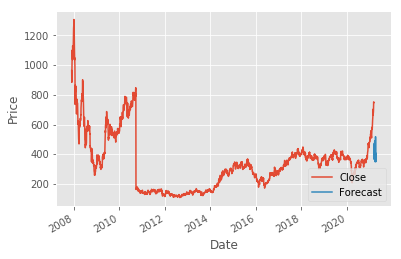

In [86]:
df['Forecast']=np.nan
last_date=df.iloc[-1].name
last_unix = arrow.get(last_date).timestamp
one_day=86400
next_unix=last_unix + one_day

for i in forecast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix +=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] + [i]

df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
    

In [87]:
#Forecast line is the predicted future price for 100 days from above graph